In [1]:
import socket
with socket.socket(socket.AF_INET, socket.SOCK_STREAM) as s:     # 소켓 s를 하나 열어서
    s.connect(('www.google.com', 80))          # www.google.com 이라는 호스트의 80번 포트에 접속합니다. 
    cmd = 'GET http://www.google.com HTTP/1.0\r\n\r\n'.encode() 
    s.send(cmd)                 # 접속이 되면 GET xxxxx 형식의 HTTP 프로토콜로 된 명령을 전송합니다. 
    data = s.recv(1024)    # 그리고 1024바이트만큼의 HTTP 응답을 수신합니다. 
print('Received', data)  # 어떤 응답을 수신했는지 볼까요?

Received b'HTTP/1.0 404 Not Found\r\nContent-Type: text/html; charset=UTF-8\r\nDate: Wed, 02 Dec 2020 11:22:18 GMT\r\nServer: gws\r\nContent-Length: 1561\r\nX-XSS-Protection: 0\r\nX-Frame-Options: SAMEORIGIN\r\n\r\n<!DOCTYPE html>\n<html lang=en>\n  <meta charset=utf-8>\n  <meta name=viewport content="initial-scale=1, minimum-scale=1, width=device-width">\n  <title>Error 404 (Not Found)!!1</title>\n  <style>\n    *{margin:0;padding:0}html,code{font:15px/22px arial,sans-serif}html{background:#fff;color:#222;padding:15px}body{margin:7% auto 0;max-width:390px;min-height:180px;padding:30px 0 15px}* > body{background:url(//www.google.com/images/errors/robot.png) 100% 5px no-repeat;padding-right:205px}p{margin:11px 0 22px;overflow:hidden}ins{color:#777;text-decoration:none}a img{border:0}@media screen and (max-width:772px){body{background:none;margin-top:0;max-width:none;padding-right:0}}#logo{background:url(//www.google.com/images/branding/googlelogo/1x/googlelogo_color_150x54dp.png) no-rep

In [2]:

import requests
myapi = "af44a23b3fa31260fd92b236a65bffa3"

#lat: 위도, #lon:경도
def makeurl(lat, lng):
    url = "https://api.openweathermap.org/data/2.5/onecall?lat={}&lon={}&appid={}".format(lat, lng, myapi)
    return url

response = requests.get(makeurl(37,127))
weather = response.json()
weather

{'lat': 37,
 'lon': 127,
 'timezone': 'Asia/Seoul',
 'timezone_offset': 32400,
 'current': {'dt': 1606908308,
  'sunrise': 1606861662,
  'sunset': 1606896931,
  'temp': 275.27,
  'feels_like': 270.2,
  'pressure': 1029,
  'humidity': 47,
  'dew_point': 266.03,
  'uvi': 0,
  'clouds': 75,
  'visibility': 10000,
  'wind_speed': 3.1,
  'wind_deg': 320,
  'weather': [{'id': 803,
    'main': 'Clouds',
    'description': 'broken clouds',
    'icon': '04n'}]},
 'minutely': [{'dt': 1606908360, 'precipitation': 0},
  {'dt': 1606908420, 'precipitation': 0},
  {'dt': 1606908480, 'precipitation': 0},
  {'dt': 1606908540, 'precipitation': 0},
  {'dt': 1606908600, 'precipitation': 0},
  {'dt': 1606908660, 'precipitation': 0},
  {'dt': 1606908720, 'precipitation': 0},
  {'dt': 1606908780, 'precipitation': 0},
  {'dt': 1606908840, 'precipitation': 0},
  {'dt': 1606908900, 'precipitation': 0},
  {'dt': 1606908960, 'precipitation': 0},
  {'dt': 1606909020, 'precipitation': 0},
  {'dt': 1606909080, 'prec

# 17-10. 크롤링이해하기_크롤러만들기

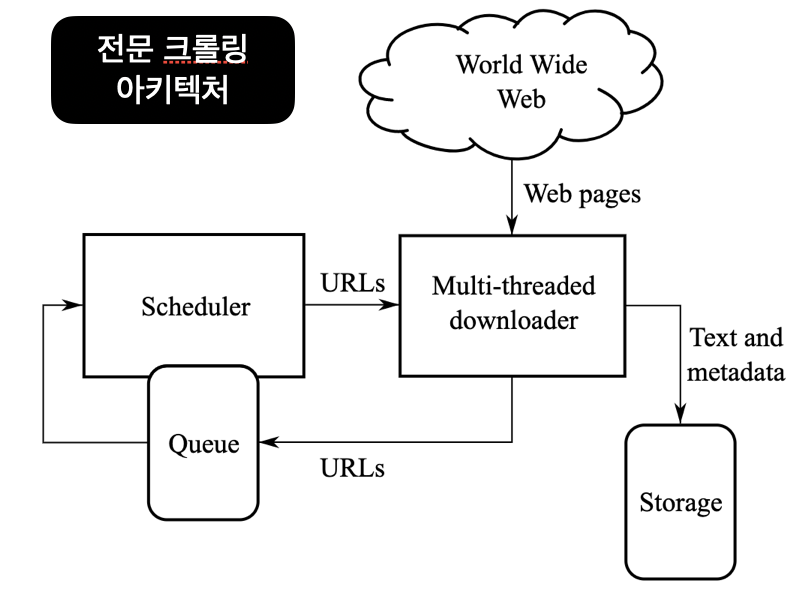

웹을 크롤링하는 가장 기본 작업입니다. 우선 2가지 작업에 대해 자주 사용되는 파이썬 라이브러리 기능을 살펴보겠습니다.

    1단계: 웹페이지 다운로드하기
    2단계: 웹페이지 분석하기

1.파이썬 표준 라이브러리 urllib 사용하기

    웹페이지 다운로드

웹페이지 다운로드를 하기 위해선 해당 홈페이지로 접속해야 합니다. 홈페이지 접속은 주소, 즉 URL을 입력해서 합니다. 파이썬을 이용하면, 다음과 같습니다.

In [3]:
#urlopen()함수를 통해 해당 서버에서 요청받은 "HTTPResponse"객체를 반환
import urllib
def download(url):
    return urllib.request.urlopen(url)

In [4]:
from urllib.error import URLError, HTTPError, ContentTooShortError

def download(url):
    try:
        html = urllib.request.urlopen(url)
    except (URLError, HTTPError, ContentTooShortError) as e:
        print('Download error', e.reason)
        html = None
    return html

download('https://www.google.com')

In [5]:
def download(url):
    try:
        html = urllib.request.urlopen(url).read()
    except (URLError, HTTPError, ContentTooShortError) as e:
        print('Download error', e.reason)
        html = None
    return html

2. 웹페이지 분석하기_페이지소스

웹 데이터는 HTML 태그 사이에 있는데요, 웹 페이지를 분석하기 위해선 HTML 사이의 데이터를 파싱해서 가져와야 합니다. 그리고 이 데이터를 가져오는 방법은 urlopen()의 read()메소드를 이용하는 거에요.

In [6]:
def download(url):
    try:
        html = urllib.request.urlopen(url).read()
    except (URLError, HTTPError, ContentTooShortError) as e:
        print('Download error', e.reason)
        html = None
    return html

In [7]:
download('https://www.google.com')

b'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="ko"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/logos/doodles/2020/december-holidays-days-2-30-6753651837108830.3-law.gif" itemprop="image"><meta content="&#50672;&#47568; &#49828;&#54168;&#49500;" property="twitter:title"><meta content="#GoogleDoodle" property="twitter:description"><meta content="#GoogleDoodle" property="og:description"><meta content="summary_large_image" property="twitter:card"><meta content="@GoogleDoodles" property="twitter:site"><meta content="https://www.google.com/logos/doodles/2020/december-holidays-days-2-30-6753651837108830.2-2xa.gif" property="twitter:image"><meta content="https://www.google.com/logos/doodles/2020/december-holidays-days-2-30-6753651837108830.2-2xa.gif" property="og:image"><meta content="1100" property="og:image:width"><meta content="440" property="og:image:height"><meta content="https://www.google.com/logos/doodles/2020

 BeautifulSoup과 Requests 설치 후 (리눅스에)
 $ pip install bs4
$ pip install requests

In [8]:
import requests
url = 'http://www.google.com'
response = requests.get(url)
response

<Response [200]>

In [9]:
def download2(url):
    try:
        response = requests.get(url)
        html = response.text
    except requests.ConnectionError:
        print('Connection error')
        html = None
    return html

download2('https://www.google.com')

'<!doctype html><html itemscope="" itemtype="http://schema.org/WebPage" lang="ko"><head><meta content="text/html; charset=UTF-8" http-equiv="Content-Type"><meta content="/logos/doodles/2020/december-holidays-days-2-30-6753651837108830.3-law.gif" itemprop="image"><meta content="&#50672;&#47568; &#49828;&#54168;&#49500;" property="twitter:title"><meta content="#GoogleDoodle" property="twitter:description"><meta content="#GoogleDoodle" property="og:description"><meta content="summary_large_image" property="twitter:card"><meta content="@GoogleDoodles" property="twitter:site"><meta content="https://www.google.com/logos/doodles/2020/december-holidays-days-2-30-6753651837108830.2-2xa.gif" property="twitter:image"><meta content="https://www.google.com/logos/doodles/2020/december-holidays-days-2-30-6753651837108830.2-2xa.gif" property="og:image"><meta content="1100" property="og:image:width"><meta content="440" property="og:image:height"><meta content="https://www.google.com/logos/doodles/2020/

웹페이지분석 == BeautifulSoup활용

In [10]:
import requests
from bs4 import BeautifulSoup
html = requests.get('http://www.google.com')
soup = BeautifulSoup(html.text, 'html.parser')

In [11]:
soup.html.body

<body bgcolor="#fff"><script nonce="tc3dph87BISBqCHA8iTCYw==">(function(){var src='/images/nav_logo229.png';var iesg=false;document.body.onload = function(){window.n && window.n();if (document.images){new Image().src=src;}
if (!iesg){document.f&&document.f.q.focus();document.gbqf&&document.gbqf.q.focus();}
}
})();</script><div id="mngb"><div id="gbar"><nobr><b class="gb1">검색</b> <a class="gb1" href="http://www.google.co.kr/imghp?hl=ko&amp;tab=wi">이미지</a> <a class="gb1" href="http://maps.google.co.kr/maps?hl=ko&amp;tab=wl">지도</a> <a class="gb1" href="https://play.google.com/?hl=ko&amp;tab=w8">Play</a> <a class="gb1" href="http://www.youtube.com/?gl=KR&amp;tab=w1">YouTube</a> <a class="gb1" href="https://news.google.com/?tab=wn">뉴스</a> <a class="gb1" href="https://mail.google.com/mail/?tab=wm">Gmail</a> <a class="gb1" href="https://drive.google.com/?tab=wo">드라이브</a> <a class="gb1" href="https://www.google.co.kr/intl/ko/about/products?tab=wh" style="text-decoration:none"><u>더보기</u> »</a><

In [13]:
#pan태그의 내용에 접근
soup = BeautifulSoup("<span>Wow it's so good!!</span>", 'html.parser')
soup.span

<span>Wow it's so good!!</span>

html예시 (실행하지말기)
<title>Fundamental</title> 
        <body>
          <p id='programming'>python</p>
          <p id='programming'>java</p>
          <p id='algorithm'>algorithm</p>
          <p id='fundamental'>math</p>
          <p id='programming'>C++</p>     
         </body>

In [14]:
# ''', """ 는 여러줄의 문자열을 입력할 때 사용
html='''<title>Fundamental</title> 
         <body>
          <p id='programming'>python</p> 
          <p id='programming'>java</p> 
          <p id='algorithm'>algorithm</p> 
          <p id='fundamental'>math</p> 
          <p id='programming'>C++</p> 
          </body>'''
soup = BeautifulSoup(html, 'html.parser')
soup.findAll({'p'})

[<p id="programming">python</p>,
 <p id="programming">java</p>,
 <p id="algorithm">algorithm</p>,
 <p id="fundamental">math</p>,
 <p id="programming">C++</p>]

In [16]:
#p태그에서 속성값이 programming인 태그찾기
soup.findAll('p', id='programming')

[<p id="programming">python</p>,
 <p id="programming">java</p>,
 <p id="programming">C++</p>]

# 17-11.크롤링이용하기_환율

실전에서 환율 크롤링
크롤링 사이트: https://m.stock.naver.com/marketindex/index.nhn

In [19]:
from bs4 import BeautifulSoup
import requests

#URL 가져오기
url = 'https://m.stock.naver.com/marketindex/index.nhn'
response = requests.get(url)

#Soup 객체 생성
soup = BeautifulSoup(response.text, 'html.parser')

#원하는 데이터 추출 - 국가
country = []
country_1 = soup.findAll('strong')
country_2 = soup.findAll('span', {'class':'stock_item'})
for c in country_1:
    country.append(c.text)
for c in country_2:
    country.append(c.text)
    country.remove('컨텐츠 제공업체')
    country.remove('증권')

#원하는 데이터 추출 - 환율정보
price = []
price_0 = soup.findAll('span', {"class":"stock_price"})
for p in price_0:
    price.append(p.text)

#데이터 정렬, (pandas)
import pandas as pd
data = {}
for i in range(len(country)):
    data[country[i]] = price[i]

pd.Series(data)


ValueError: list.remove(x): x not in list

# 17-12. 크롤링이용하기_로그인

In [20]:
#세션 생성하기
session = requests.session()

#로그인하기
log_info = {'id':'', #여러분의 ID와 PW를 입력해 주세요
            'pw':''}
url = 'https://nid.naver.com/nidlogin.login'
response = session.post(url, data=log_info)

#마이페이지 접근하기
url_mypage = 'https://nid.naver.com/user2/help/myInfo.nhn?lang=ko_KR'
response = session.get(url_mypage)

#Soup객체 생성
soup = BeautifulSoup(response.text, 'html.parser')

#마이페이지에 별명 가져 오기
soup.find('span')

<span>본문으로 바로가기</span>

# 17-13.크롤링이용하기_브라우저제어를 통한 크롤링

In [21]:
crawling_urls = {
"산과공원": "https://data.seoul.go.kr/dataList/OA-12962/S/1/datasetView.do",
}

In [22]:
import requests
from selenium import webdriver
import time
import pandas as pd
import os
import os.path
import glob

ModuleNotFoundError: No module named 'selenium'

2. 셀레니움을 이용하여 브라우저 제어하기

셀레니움의 find_element_by_css_selector() 를 이용할건데요. 버튼의 css selector를 이용해서 csv다운로드 버튼의 위치를 알아낼수 있답니다.

그럼 버튼의 css selector는 어떻게 알아내냐구요?
먼저 해당 사이트에서 키보드의 F12 를 눌러 소스코드 창을 열어주세요.
그리고 소스코드창의 상단 왼쪽모서리에 있는 화살표 모양 버튼을 클릭하거나 단축키인 Ctrl+Shift+C를 사용하면 버튼 등의 웹페이지 요소를 마우스로 직접 선택할 수 있게됩니다.

이때 우리가 클릭해야하는 내려받기(CSV) 버튼을 마우스를 선택하면 소스코드창에서 해당 코드 부분이 선택될텐데요. 선택된 코드가 맞는지 다시 확인하고, 코드에서 오른쪽 마우스를 클릭하여 Copy > Copy selector를 선택해주세요.

복사한 값은 find_element_by_css_selector()의 인자로 사용할거에요.

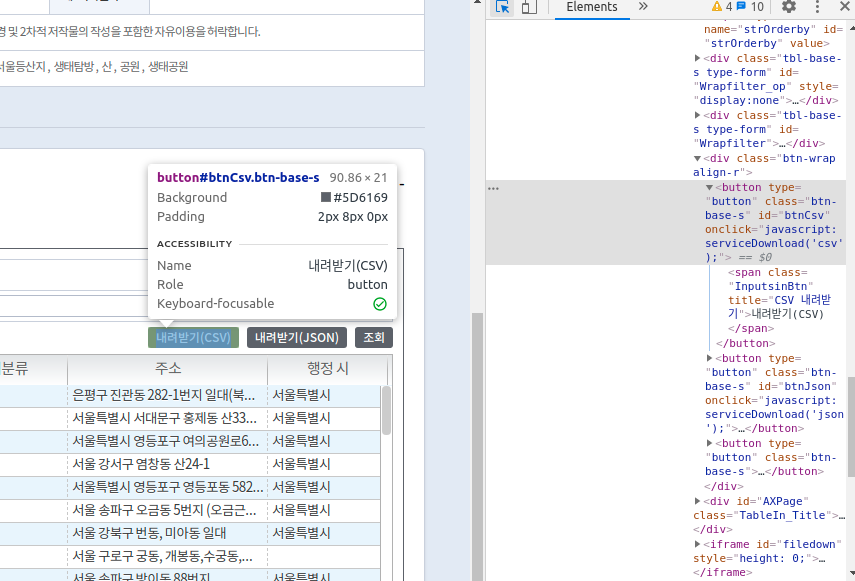

In [24]:
import os

wd_path = os.getenv('HOME')+'/aiffel/lib/chromedriver'

#웹드라이버 실행 및 페이지 이동
driver = webdriver.Chrome(wd_path)   # 크롬드라이버를 통해 브라우저를 띄우고
driver.get(crawling_urls['산과공원'])      # 우리가 원하는 URL로 이동합니다.
time.sleep(5)       # 해당 화면이 다 로딩할 때까지 5초간 충분히 기다려 줍니다. 
    
#csv파일 다운로드 버튼 클릭하기
driver.find_element_by_css_selector("#btnCsv").click()   # 사람이 누른 것처럼 다운로드 버튼을 클릭한 후
time.sleep(3)     # 다운로드가 완료될 때까지 3초간 기다려 줍니다. 

driver.quit()      # 브라우저를 닫습니다.

NameError: name 'webdriver' is not defined

In [25]:
import os

wd_path = os.getenv('HOME')+'/aiffel/lib/chromedriver'

#웹드라이버 실행 및 페이지 이동
driver = webdriver.Chrome(wd_path)   # 크롬드라이버를 통해 브라우저를 띄우고
driver.get(crawling_urls['산과공원'])      # 우리가 원하는 URL로 이동합니다.
time.sleep(5)       # 해당 화면이 다 로딩할 때까지 5초간 충분히 기다려 줍니다. 
    
#csv파일 다운로드 버튼 클릭하기
driver.find_element_by_css_selector("#btnCsv").click()   # 사람이 누른 것처럼 다운로드 버튼을 클릭한 후
time.sleep(3)     # 다운로드가 완료될 때까지 3초간 기다려 줍니다. 

driver.quit()      # 브라우저를 닫습니다.

NameError: name 'webdriver' is not defined

In [26]:
import os

wd_path = os.getenv('HOME')+'/aiffel/lib/chromedriver'

#웹드라이버 실행 및 페이지 이동
driver = webdriver.Chrome(wd_path)   # 크롬드라이버를 통해 브라우저를 띄우고
driver.get(crawling_urls['산과공원'])      # 우리가 원하는 URL로 이동합니다.
time.sleep(5)       # 해당 화면이 다 로딩할 때까지 5초간 충분히 기다려 줍니다. 
    
#csv파일 다운로드 버튼 클릭하기
driver.find_element_by_css_selector("#btnCsv").click()   # 사람이 누른 것처럼 다운로드 버튼을 클릭한 후
time.sleep(3)     # 다운로드가 완료될 때까지 3초간 기다려 줍니다. 

driver.quit()      # 브라우저를 닫습니다.

NameError: name 'webdriver' is not defined